In [1]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
data=pd.read_csv(r'C:\Users\Admin\Desktop\it_VEDANT\My Learnbay Folder\My Learnbay Folder\Stat and ML by Utkarsha sir\ML_BY_ME\11th Feb 2023\bank.csv')

In [3]:
data.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,1,227,147,111,2460,639
1,2,123,86,65,3510,436
2,3,306,149,76,2570,669
3,4,251,112,129,3650,623
4,5,174,135,128,3400,579


In [4]:
data.isnull().sum()

Bank                   0
DD                     0
Withdrawals            0
Deposits               0
Branch Area in sqft    0
avg daily walkins      0
dtype: int64

In [5]:
clust_data=data.drop('Bank',axis=1)

In [6]:
clust_data

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,227,147,111,2460,639
1,123,86,65,3510,436
2,306,149,76,2570,669
3,251,112,129,3650,623
4,174,135,128,3400,579
...,...,...,...,...,...
510,337,140,111,2640,694
511,168,131,60,2640,524
512,333,86,108,2850,676
513,192,176,34,2760,505


In [7]:
###we have to do scaling for this data 

In [8]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled_data=ss.fit_transform(clust_data)

In [9]:
scaled_data

array([[-0.07888413, -0.06497257,  1.02602411, -1.08710095,  0.48432644],
       [-1.64081915, -1.13811308, -0.58410514,  1.31763546, -1.949528  ],
       [ 1.10758573, -0.02978763, -0.19907423, -0.83517619,  0.84400936],
       ...,
       [ 1.51308809, -1.13811308,  0.92101568, -0.19391314,  0.92793538],
       [-0.60453534,  0.44520899, -1.66919225, -0.40003341, -1.12225728],
       [ 1.48305088,  0.62113366,  0.53598477, -0.53744692,  2.01897357]])

In [10]:
df=pd.DataFrame(scaled_data,columns=clust_data.columns)
df

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,-0.078884,-0.064973,1.026024,-1.087101,0.484326
1,-1.640819,-1.138113,-0.584105,1.317635,-1.949528
2,1.107586,-0.029788,-0.199074,-0.835176,0.844009
3,0.281562,-0.680709,1.656075,1.638267,0.292496
4,-0.874870,-0.276082,1.621072,1.065711,-0.235039
...,...,...,...,...,...
510,1.573163,-0.188120,1.026024,-0.674860,1.143745
511,-0.964982,-0.346452,-0.759119,-0.674860,-0.894458
512,1.513088,-1.138113,0.921016,-0.193913,0.927935
513,-0.604535,0.445209,-1.669192,-0.400033,-1.122257


In [11]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(2,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)   # inertia==wcss

In [12]:
print(wcss)

[1944.464969787401, 1593.970857719221, 1460.986460341715, 1232.723844981308, 1159.4670506851048, 1064.963932198374, 963.335993705118, 903.7871651540737]


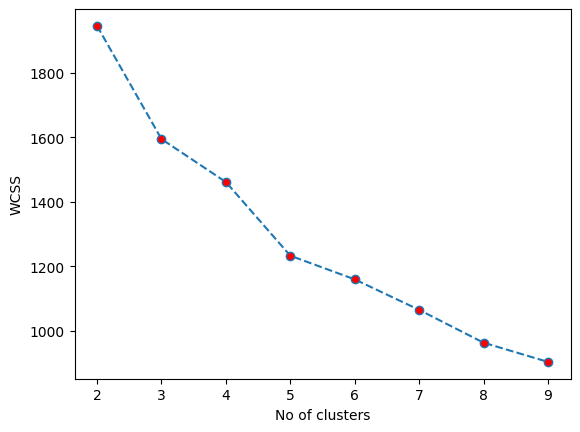

In [13]:
lst=[i for i in range(2,10)]  # no of clusters
plt.figure()
plt.plot(lst,wcss,marker='o',mfc='red',linestyle='--')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
kmeans=KMeans(n_clusters=6)
y_pred_clusters=kmeans.fit_predict(scaled_data)

In [15]:
y_pred_clusters

array([0, 4, 0, 3, 5, 2, 5, 2, 0, 3, 0, 0, 2, 5, 3, 3, 2, 1, 4, 1, 5, 5,
       2, 0, 5, 1, 5, 5, 5, 2, 3, 0, 5, 5, 1, 5, 4, 3, 0, 4, 5, 3, 1, 2,
       2, 0, 0, 1, 2, 3, 5, 2, 3, 0, 5, 0, 2, 1, 2, 1, 1, 3, 1, 0, 4, 5,
       5, 4, 5, 3, 4, 0, 5, 4, 2, 1, 1, 4, 5, 0, 3, 4, 1, 5, 2, 3, 2, 5,
       5, 1, 1, 2, 0, 5, 5, 4, 4, 0, 5, 3, 3, 4, 1, 4, 0, 2, 2, 2, 0, 1,
       0, 5, 3, 1, 0, 4, 1, 1, 1, 3, 1, 4, 3, 3, 5, 5, 1, 2, 1, 3, 5, 3,
       1, 2, 0, 5, 5, 4, 0, 0, 3, 2, 1, 0, 0, 5, 0, 1, 0, 3, 5, 0, 3, 3,
       4, 4, 3, 1, 2, 5, 2, 0, 0, 0, 0, 1, 5, 5, 0, 1, 5, 1, 3, 0, 4, 2,
       4, 3, 0, 4, 5, 4, 2, 4, 0, 1, 2, 5, 1, 5, 5, 4, 4, 1, 0, 4, 4, 4,
       3, 1, 5, 1, 1, 4, 2, 1, 4, 4, 3, 1, 1, 1, 2, 4, 1, 1, 3, 4, 1, 2,
       3, 5, 1, 1, 0, 5, 2, 2, 3, 2, 3, 4, 2, 3, 5, 0, 5, 5, 2, 1, 3, 2,
       0, 2, 0, 1, 2, 4, 3, 4, 4, 0, 4, 3, 1, 1, 4, 1, 0, 0, 0, 5, 1, 4,
       2, 2, 4, 5, 0, 3, 3, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 3, 2, 2, 3,
       3, 0, 3, 1, 3, 0, 1, 5, 1, 1, 0, 4, 0, 0, 0,

In [16]:
data['CLuster Label']=y_pred_clusters
data

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,CLuster Label
0,1,227,147,111,2460,639,0
1,2,123,86,65,3510,436,4
2,3,306,149,76,2570,669,0
3,4,251,112,129,3650,623,3
4,5,174,135,128,3400,579,5
...,...,...,...,...,...,...,...
510,511,337,140,111,2640,694,3
511,512,168,131,60,2640,524,4
512,513,333,86,108,2850,676,3
513,514,192,176,34,2760,505,4


In [19]:
data.groupby('CLuster Label').mean()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
CLuster Label,,,,,,
0,240.956044,242.725275,193.043956,87.406593,2305.054945,653.780220
1,275.192661,289.284404,95.651376,68.532110,3100.000000,585.605505
2,241.710145,236.652174,210.492754,63.014493,3155.652174,646.217391
3,267.820513,282.487179,166.576923,106.358974,3010.128205,689.205128
4,277.451220,158.048780,160.256098,56.146341,2979.390244,510.865854
5,239.860465,170.546512,104.139535,109.267442,3102.965116,519.976744


## Heirarchical Clustering

In [21]:
##### Visualize the clusters
clust_data.head()

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,227,147,111,2460,639
1,123,86,65,3510,436
2,306,149,76,2570,669
3,251,112,129,3650,623
4,174,135,128,3400,579


In [26]:
scaled_data

array([[-0.07888413, -0.06497257,  1.02602411, -1.08710095,  0.48432644],
       [-1.64081915, -1.13811308, -0.58410514,  1.31763546, -1.949528  ],
       [ 1.10758573, -0.02978763, -0.19907423, -0.83517619,  0.84400936],
       ...,
       [ 1.51308809, -1.13811308,  0.92101568, -0.19391314,  0.92793538],
       [-0.60453534,  0.44520899, -1.66919225, -0.40003341, -1.12225728],
       [ 1.48305088,  0.62113366,  0.53598477, -0.53744692,  2.01897357]])

In [22]:
import scipy.cluster.hierarchy as sch

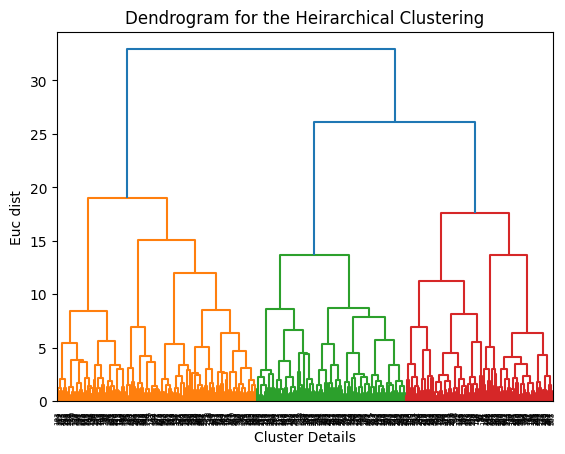

In [24]:
dendrogram=sch.dendrogram(sch.linkage(scaled_data,method='ward'))
plt.title('Dendrogram for the Heirarchical Clustering')
plt.xlabel('Cluster Details')
plt.ylabel('Euc dist')
plt.show()

In [27]:
### From this dendrogram we can take no of clusters=7
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=7,metric='euclidean',linkage='ward')

In [29]:
y_pred_hc=hc.fit_predict(scaled_data)
y_pred_hc

array([3, 1, 2, 6, 1, 5, 1, 4, 2, 2, 2, 3, 5, 6, 6, 6, 0, 6, 4, 6, 1, 1,
       4, 2, 6, 4, 3, 1, 1, 2, 2, 0, 1, 1, 4, 1, 0, 6, 2, 0, 1, 2, 4, 5,
       5, 3, 2, 4, 0, 3, 1, 5, 3, 2, 1, 2, 5, 4, 3, 6, 4, 2, 4, 3, 3, 1,
       3, 0, 1, 2, 0, 0, 1, 0, 5, 4, 4, 0, 1, 2, 2, 0, 4, 6, 5, 4, 5, 3,
       1, 4, 6, 3, 2, 3, 3, 0, 0, 3, 1, 3, 3, 0, 4, 3, 2, 3, 3, 5, 2, 4,
       3, 1, 2, 4, 0, 0, 6, 4, 2, 3, 4, 0, 3, 3, 1, 1, 4, 5, 6, 6, 1, 6,
       4, 2, 2, 3, 1, 0, 2, 4, 2, 5, 6, 2, 2, 1, 2, 6, 2, 3, 1, 2, 2, 2,
       3, 0, 6, 6, 5, 3, 5, 0, 3, 2, 2, 6, 1, 1, 2, 6, 1, 6, 6, 3, 0, 5,
       1, 3, 0, 1, 1, 4, 3, 0, 3, 4, 2, 1, 4, 1, 3, 0, 4, 6, 0, 0, 1, 0,
       3, 6, 1, 4, 6, 1, 5, 4, 0, 3, 3, 4, 4, 4, 4, 0, 6, 6, 3, 3, 6, 5,
       2, 6, 4, 4, 2, 1, 3, 5, 2, 5, 2, 0, 3, 2, 1, 3, 0, 3, 3, 6, 2, 5,
       3, 2, 0, 4, 3, 1, 3, 0, 0, 3, 0, 2, 6, 6, 1, 4, 3, 4, 2, 0, 4, 0,
       5, 4, 1, 1, 4, 2, 2, 6, 3, 4, 3, 3, 5, 2, 2, 5, 3, 3, 3, 4, 3, 2,
       3, 2, 2, 4, 6, 2, 4, 1, 4, 4, 0, 0, 4, 2, 2,

In [30]:
data['Heirarchical Cluster']=y_pred_hc

In [31]:
data.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,CLuster Label,Heirarchical Cluster
0,1,227,147,111,2460,639,0,3
1,2,123,86,65,3510,436,4,1
2,3,306,149,76,2570,669,0,2
3,4,251,112,129,3650,623,3,6
4,5,174,135,128,3400,579,5,1
